# Instrument Classification - Part 2 : CNN

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Activation,BatchNormalization

In [35]:
x_train = np.load('x_train.npy')
x_test  = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test  = np.load('y_test.npy')

In [41]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=1,input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',strides=1))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',strides=1))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(640,kernel_size=(3,3),padding='same',strides=1))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(BatchNormalization())
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 96, 87, 64)        640       
_________________________________________________________________
batch_normalization_51 (Batc (None, 96, 87, 64)        256       
_________________________________________________________________
activation_62 (Activation)   (None, 96, 87, 64)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 48, 43, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 48, 43, 128)       73856     
_________________________________________________________________
batch_normalization_52 (Batc (None, 48, 43, 128)       512       
_________________________________________________________________
activation_63 (Activation)   (None, 48, 43, 128)       0         
__________

Train on 3666 samples, validate on 408 samples
Epoch 1/10
3666/3666 [==============================] - 709s 193ms/step - loss: 0.4966 - acc: 0.7624 - val_loss: 0.3400 - val_acc: 0.8431
Epoch 2/10
3666/3666 [==============================] - 718s 196ms/step - loss: 0.2764 - acc: 0.8860 - val_loss: 0.2834 - val_acc: 0.8627
Epoch 3/10
3666/3666 [==============================] - 689s 188ms/step - loss: 0.2174 - acc: 0.9193 - val_loss: 0.2594 - val_acc: 0.8873
Epoch 4/10
3666/3666 [==============================] - 787s 215ms/step - loss: 0.1549 - acc: 0.9520 - val_loss: 0.3008 - val_acc: 0.8603
Epoch 5/10
3666/3666 [==============================] - 652s 178ms/step - loss: 0.1221 - acc: 0.9697 - val_loss: 0.2231 - val_acc: 0.8971
Epoch 6/10
3666/3666 [==============================] - 628s 171ms/step - loss: 0.0962 - acc: 0.9812 - val_loss: 0.2082 - val_acc: 0.8971
Epoch 7/10
3666/3666 [==============================] - 634s 173ms/step - loss: 0.0810 - acc: 0.9861 - val_loss: 0.1853 - val

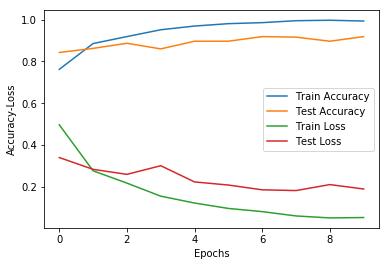

In [42]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy-Loss')
plt.legend()

model.save('ICmodel_new2.h5')